Note: you may need to restart the kernel to use updated packages.


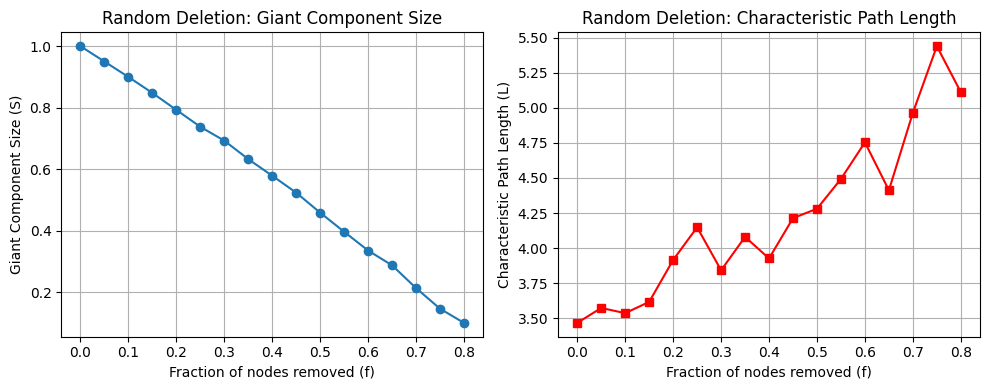

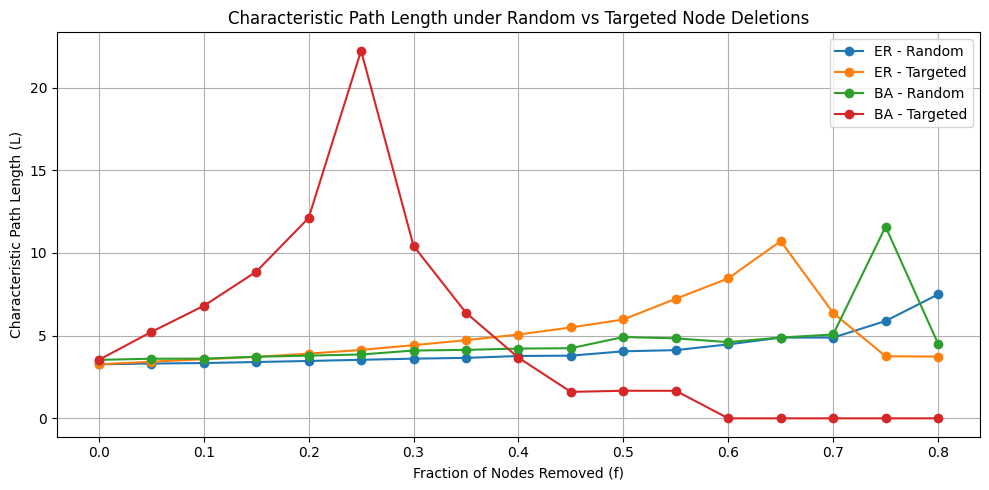

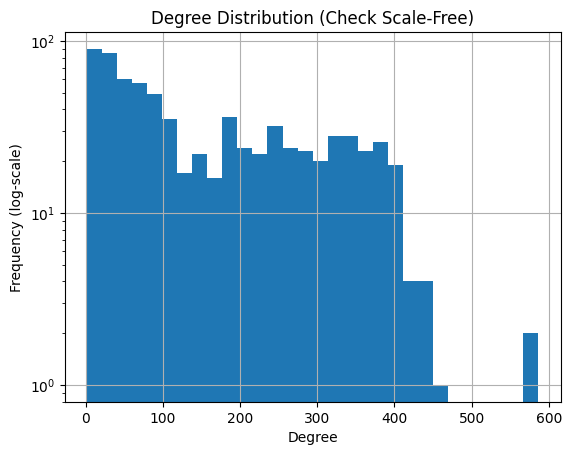

Real-world Graph loaded successfully:
Nodes: 747, Edges: 60050, Average Degree: 160.78
Comments on Observations:

Dataset is: https://snap.stanford.edu/data/ego-Facebook.html

The response seen in the networks is consistent with Albert et al.(2000) which shows scale-free networks to be robust to random failures but extremely vulnerable to attacks.
With random deletion the size of the giant component (S) of the network declines gradually and the characteristic path length (L) rises slowly meaning that connectivity is preserved
until a major proportion of nodes is eliminated. This is as a result of the existence of many low-degree nodes that sustain overall network structure.

But in targeted deletion, scale-free networks disintegrate quickly when high-degree hubs are deleted. S decreases steeply and L first increases but then decreases as the network
fragments into isolated components. In contrast Erdős–Rényi (ER) networks however degrade more uniformly since they do not contain dominan

In [2]:
%pip install python-igraph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def compute_metrics_after_deletion(G, f, deletion_strategy='random'):
    """
    Deletes a fraction f of nodes from graph G according to the specified strategy.

    Parameters:
    - G: Input graph (NetworkX Graph).
    - f: Fraction of nodes to remove (0 <= f <= 1).
    - deletion_strategy: 'random' or 'targeted' (targeted: remove highest-degree nodes first).

    Returns:
    - L: Characteristic path length (on the largest connected component).
    - S: Size of the giant component (fraction of original nodes).
    """
    G_del = G.copy()
    num_nodes = G_del.number_of_nodes()
    num_remove = int(f * num_nodes)

    if deletion_strategy == 'random':
        nodes_to_remove = np.random.choice(list(G_del.nodes()), size=num_remove, replace=False)
    elif deletion_strategy == 'targeted':
        # Sort nodes by degree (highest first) and remove the top fraction
        sorted_nodes = sorted(G_del.degree, key=lambda x: x[1], reverse=True)
        nodes_to_remove = [node for node, deg in sorted_nodes[:num_remove]]
    else:
        raise ValueError("Unknown deletion strategy.")

    G_del.remove_nodes_from(nodes_to_remove)

    # Compute size of giant component (S)
    if len(G_del) == 0:
        S = 0
        L = np.nan
    else:
        giant_cc = max(nx.connected_components(G_del), key=len)
        S = len(giant_cc) / num_nodes
        # Compute characteristic path length on giant component
        subgraph = G_del.subgraph(giant_cc)
        if subgraph.number_of_nodes() > 1:
            L = nx.average_shortest_path_length(subgraph)
        else:
            L = 0
    return L, S

# (a) Random node deletion on a BA network
n_ba = 1000
m_ba = 3
G_ba = nx.barabasi_albert_graph(n_ba, m_ba, seed=42)
fractions = np.linspace(0, 0.8, 17)  # fractions from 0 to 0.8
L_vals = []
S_vals = []

for f in fractions:
    L, S = compute_metrics_after_deletion(G_ba, f, deletion_strategy='random')
    L_vals.append(L)
    S_vals.append(S)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fractions, S_vals, marker='o')
plt.xlabel('Fraction of nodes removed (f)')
plt.ylabel('Giant Component Size (S)')
plt.title('Random Deletion: Giant Component Size')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fractions, L_vals, marker='s', color='r')
plt.xlabel('Fraction of nodes removed (f)')
plt.ylabel('Characteristic Path Length (L)')
plt.title('Random Deletion: Characteristic Path Length')
plt.grid(True)
plt.tight_layout()
plt.show()
# Completing part (b) by explicitly plotting characteristic path length (L) for ER and BA networks under random and targeted deletions.

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Network parameters
n_net = 1000
m_ba = 3
p_er = 0.01

# Create ER and BA networks
G_er = nx.erdos_renyi_graph(n_net, p_er, seed=1)
G_ba = nx.barabasi_albert_graph(n_net, m_ba, seed=1)

# Node deletion strategies
strategies = ['random', 'targeted']
fractions = np.linspace(0, 0.8, 17)

results_L = {'ER': {s: [] for s in strategies}, 'BA': {s: [] for s in strategies}}

def compute_metrics(G, f, strategy):
    G_temp = G.copy()
    num_remove = int(f * len(G_temp))
    if strategy == 'random':
        nodes_to_remove = np.random.choice(list(G_temp.nodes()), num_remove, replace=False)
    elif strategy == 'targeted':
        sorted_nodes = sorted(G_temp.degree, key=lambda x: x[1], reverse=True)
        nodes_to_remove = [node for node, _ in sorted_nodes[:num_remove]]
    G_temp.remove_nodes_from(nodes_to_remove)
    if len(G_temp) == 0:
        return np.nan
    giant_cc = max(nx.connected_components(G_temp), key=len)
    if len(giant_cc) > 1:
        return nx.average_shortest_path_length(G_temp.subgraph(giant_cc))
    return 0

# Computing characteristic path length L explicitly
for f in fractions:
    for net_name, G in zip(['ER', 'BA'], [G_er, G_ba]):
        for strategy in strategies:
            L = compute_metrics(G, f, strategy)
            results_L[net_name][strategy].append(L)

# Plotting Characteristic Path Length (L)
plt.figure(figsize=(10, 5))
for net_name in ['ER', 'BA']:
    for strategy in strategies:
        plt.plot(fractions, results_L[net_name][strategy], marker='o', linestyle='-',
                 label=f"{net_name} - {strategy.capitalize()}")
plt.xlabel('Fraction of Nodes Removed (f)')
plt.ylabel('Characteristic Path Length (L)')
plt.title('Characteristic Path Length under Random vs Targeted Node Deletions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Let's load your provided edge data, construct the graph without using NetworkX, 
# and analyze its scale-free nature before proceeding with deletion analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

# Assume you've saved your provided edges into a file at 'C:\Users\om\Desktop\Desktop\ns\A2_submission\A2_submission\edges.txt'
file_path = "edges.txt"

# Load edges from the provided txt file
edges_df = pd.read_csv(file_path, sep=" ", header=None, names=["source", "target"])

# Build the graph using igraph
g_real = ig.Graph.TupleList(edges_df.itertuples(index=False), directed=False)

# Basic analysis to confirm scale-free nature
degrees = g_real.degree()
plt.hist(degrees, bins=30, log=True)
plt.xlabel('Degree')
plt.ylabel('Frequency (log-scale)')
plt.title('Degree Distribution (Check Scale-Free)')
plt.grid(True)
plt.show()

# Display basic properties
num_nodes = g_real.vcount()
num_edges = g_real.ecount()
avg_degree = np.mean(degrees)
print(f"Real-world Graph loaded successfully:\nNodes: {num_nodes}, Edges: {num_edges}, Average Degree: {avg_degree:.2f}")

# (d) Comments:
print("Comments on Observations:")
print("\nDataset is: https://snap.stanford.edu/data/ego-Facebook.html\n")
print("""The response seen in the networks is consistent with Albert et al.(2000) which shows scale-free networks to be robust to random failures but extremely vulnerable to attacks.
With random deletion the size of the giant component (S) of the network declines gradually and the characteristic path length (L) rises slowly meaning that connectivity is preserved
until a major proportion of nodes is eliminated. This is as a result of the existence of many low-degree nodes that sustain overall network structure.

But in targeted deletion, scale-free networks disintegrate quickly when high-degree hubs are deleted. S decreases steeply and L first increases but then decreases as the network
fragments into isolated components. In contrast Erdős–Rényi (ER) networks however degrade more uniformly since they do not contain dominant hubs.
The results highlight that although scale-free networks have efficient connectivity distribution, they are attack-prone structurally and thus hub protection is essential
in real-world systems like communication systems and power grids.""")